<a href="https://colab.research.google.com/github/Aadi0902/CS4375-Assignments/blob/master/andrews_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(392, 6)
coefficients: [[-0.6900664 ]
 [-0.87530019]
 [-0.66875469]
 [-3.59671496]
 [-0.25578398]
 [ 2.68549215]
 [23.44930388]].
predicted MPG: [[29.302803  ]
 [30.00124529]
 [26.61666492]
 [31.12302032]
 [21.40415502]
 [30.73089371]
 [ 8.7253024 ]
 [13.04772595]
 [31.38008895]
 [29.91454452]].
actual MPG: [27.2, 35.0, 23.8, 32.4, 18.6, 29.5, 14.0, 15.0, 30.0, 27.0].


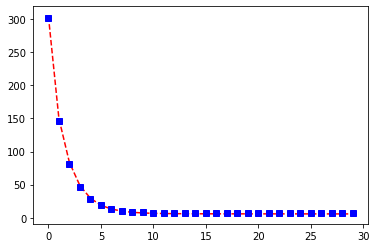

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

cols = ["mpg","cylinders","displacement","horsepower","weight","acceleration","model year","origin","car name"]
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data", sep='\s+', header=None, names = cols, na_values=["?"])
df = df.dropna()
x = df.iloc[:, 1:7]
print(x.shape)
y = df.iloc[:, 0]

# SPLITTING TEST AND TRAINING: https://scikit-learn.org/stable/modules/sgd.html#sgd
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.15)

# NORMALIZING VALUES: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor
scaler = StandardScaler()
scaler.fit(xTrain)
xTrain = scaler.transform(xTrain)
xTest = scaler.transform(xTest)
yTrain = yTrain.tolist()
yTest = yTest.tolist()
# add column of 1s https://numpy.org/doc/stable/reference/generated/numpy.c_.html
xTrain = np.c_[xTrain, np.ones((len(xTrain), 1))]
xTest = np.c_[xTest, np.ones((len(xTest), 1))]


m = len(xTrain[0])
n = len(xTrain)
n_test = len(xTest)

W = np.array([[1]] * m)
Y = np.reshape(yTrain,(n,1))
Y_test = np.reshape(yTest, (n_test, 1)) #yTest is not used for training
alpha = .01
x_axis = np.arange(30.)
y_axis_MSE = np.ones(30)
y_axis_MSEt = np.ones(30)

for i in range(900):
  H = np.dot(xTrain, W)
  E = H - Y
  dMSE = np.dot((xTrain.T), E) / n
  W = W - alpha*dMSE
  if (i%30 == 0):
    MSE = np.dot(E.T, E)/(2*n)
    y_axis_MSE[i//30] = MSE
    E_test = xTest.dot(W) - Y_test
    MSE_test = E_test.T.dot(E_test)/(2*n_test)
    y_axis_MSEt[i//30] = MSE_test
    #print('MSE on training data set: ' + str(MSE) + ", on test data: " + str(MSE_test))

print(f'coefficients: {W}.')
yPredict = np.dot(xTest, W)
print(f'predicted MPG: {yPredict[:10]}.')
print(f'actual MPG: {yTest[:10]}.')
plt.plot(x_axis, y_axis_MSE, 'r--', x_axis, y_axis_MSEt, 'bs')
plt.show()